# **Faktor apakah yang menjual sebuah mobil?**
Kamu adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web perusahaan setiap harinya. Nah, kamu ditugaskan untuk mempelajari data yang telah dikumpulkan selama beberapa tahun terakhir guna menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

## Konten <a id='back'></a>

* [Pendahuluan](#intro)
* [Tahap 1. Pra-pemrosesan](#pra_process)
    * [1.1 Memuat Data](#load_data)
    * [1.2 Mengekspolarsi Data Awal](#explore_preliminary_data)
    * [1.3 Kesimpulan dan Langkah - Langkah Selanjutnya](#conclusion_next_step)
    * [1.4 Mengatasi Nilai - Nilai yang Hilang](#missing_values)
    * [1.5 Memperbaiki Tipe Data](#fixed_data_type)
* [Tahap 2. Memperbaiki Kualitas Data](#fixed_data_quality)
    * [2.1 Memeriksa Data yang Sudah Bersih](#checking_clean_data)
* [Tahap 3. Mempelajari Parameter Inti](#core_parameter)
* [Tahap 4. Mempelajari dan Menangani Outlier](#handle_outliers)
* [Tahap 5. Mempelajari Parameter Inti Tanpa Outlier](#without_outliers)
* [Tahap 6. Masa Berlaku Iklan](#ad_validity_period)
* [Tahap 7. Harga Rata - Rata Setiap Jenis Kendaraan](#average_price)
* [Tahap 8. Faktor Harga](#price_factor)
    * [8.1 Faktor Harga Mobil SUV](#price_factor_suv)
    * [8.2 Faktor Harga Truck](#price_factor_truck)
    * [8.3 Kendaraan yang Populer](#top_vehicles)
* [Kesimpulan Umum](#general_conlusion)
* [Hipotesis](#hypotesis)
* [Rekomendasi](#recommendation)

### Pendahuluan<a id='intro'></a>

Kamu adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web perusahaan setiap harinya. Nah, kamu ditugaskan untuk mempelajari data yang telah dikumpulkan selama beberapa tahun terakhir guna menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.


Sebelum kamu menganalisis datamu, jelaskan tujuan dari proyek ini dan langkah-langkah yang akan kamu lakukan.

Tujuan dari proyek ini adalah untuk mengetahui dan menentukan faktor apasaja yang mempengaruhi harga sebuah kendaraan.
Dan langkah - langkah yang akan dilakukan antaralain; melakukan pra-pemprosesan data lalu menghitung dan menambahkan beberapa variable pada tabel, setelah itu melakukan analisis data eksploratif, dan langkah terakhir adalah mengambil kesimpulan. 

#### Tujuan :

1. Mengetahui faktor apa saja yang mempengaruhi harga sebuah kendaaraan.
2. Mengetahui jenis kendaraan apa yang paling banyak diiklankan.
3. Apakah iklan kendaraan yang ditayangkan paling lama ditayangkan pada 30 hari?
4. Mengetahui apakah tipe kendaraan mempengaruhi jumlah promosi iklan.



#### Tahapan :

Data disimpan dalam file `'/datasets/vehicles_us.csv'`. Tidak ada informasi terkait kualitas data tersebut, oleh karena itu diperlukan pemeriksaan terlebih dahulu sebelum menguji hipotesis.

Pertama-tama, kita akan mengevaluasi kualitas data dan melihat apakah terdapat masalah yang signifikan. Kemudian,  mengatasi masalah yang paling serius.
1. Pra - Pemrosesan
2. Mengatasi Nilai - Nilai yang Hilang
3. Memperbaiki Tipe Data
4. Memperbaiki Kualitas Data
5. Memeriksa Data yang Sudah Bersih
6. Mengetahui Parameter Inti
7. Mempelajari dan Menangani Outlier
8. Mengetahui Masa Berlaku Iklan
9. Menentukan Harga Rata - Rata Setiap Jenis Kendaraan
10. Menentukan Faktor Harga
11. Kesimpulan Umum

## Pra-pemrosesan <a id='pra_process'></a>

Libraries yang dibutuhkan untuk memproses data: `pandas`, `matplotlib.pyplot`, `seaborn`, `numpy`, `warnings`, `scipy`, `sklear`, `tqdm`

In [1]:
# Muat semua library
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import scipy
import sklearn
import tqdm


### Memuat Data <a id='load_data'></a>

data pada `'/datasets/vehicles_us.csv'` akan dimasukkan ke dalam variable `vehicle_data`

In [2]:
# Muat file data menjadi DataFrame

vehicles_data = pd.read_csv('/datasets/vehicles_us.csv')


In [3]:
vehicles_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


### Mengeksplorasi Data Awal <a id='explore_preliminary_data'></a>

Dataset yang kamu miliki berisi kolom-kolom berikut:

- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)- `date_posted` — tanggal iklan ditayangkan- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus
[Pahami kolom-kolomnya, lakukan eksplorasi data agar kamu terbiasa dengan data yang kamu miliki.]

In [4]:
# tampilkan informasi/rangkuman umum tentang DataFrame

vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
vehicles_data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [6]:
vehicles_data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [7]:
# tampilkan sampel data
vehicles_data.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2035,5400,2008.0,subaru outback,excellent,4.0,gas,130000.0,automatic,wagon,grey,1.0,2018-10-22,107
9670,5500,2005.0,chevrolet silverado 1500,good,8.0,gas,187072.0,automatic,truck,red,1.0,2018-11-13,65
42532,11000,2007.0,jeep wrangler,excellent,6.0,gas,151000.0,automatic,offroad,green,1.0,2018-07-02,31
33325,17490,2016.0,ford econoline,good,10.0,gas,122637.0,automatic,truck,yellow,NaN,2019-02-04,12
10096,23100,2013.0,ford mustang gt coupe 2d,good,8.0,gas,NaN,other,coupe,red,NaN,2018-07-09,93


Deskripsikan apa yang kamu lihat dari informasi umum dan sampel data yang ditampilkan. Apakah ada masalah yang memerlukan penyelidikan dan perubahan lebih lanjut?


Ans : Terdapat missing value pada kolom model_year, odometer, paint_color, dan is_4wd. Dan hal tersebut memerlukan penyelidikan dan perubahan lebih lanjut 

In [8]:
vehicles_data.loc[:, ['model_year', 'odometer', 'paint_color', 'is_4wd']]

,model_year,odometer,paint_color,is_4wd
0,2011.0,145000.0,NaN,1.0
1,NaN,88705.0,white,1.0
2,2013.0,110000.0,red,NaN
3,2003.0,NaN,NaN,NaN
4,2017.0,80903.0,black,NaN
...,...,...,...,...
51520,2013.0,88136.0,black,NaN
51521,2002.0,181500.0,white,NaN
51522,2009.0,128000.0,blue,NaN
51523,2013.0,139573.0,black,NaN


Apakah ada kolom dengan tipe data yang tidak sesuai?
Ans : Terdapat ketidak sesuaian tipe data pada kolom is_4wd

In [9]:
vehicles_data.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

Apakah ada nilai yang hilang di semua kolom atau hanya beberapa saja? Kolom mana yang memuat paling banyak nilai yang hilang? Jelaskan secara singkat apa yang kamu amati dalam 1-2 kalimat. 

Ans : Terdapat nilai yang hilang dibeberapa kolom, antara lain; model_year dengan jumlah nilai null 3619, cylinders terdapat 5260 jumlah nilai null, lalu odometer 7892 jumlah nilai null,paint_color terdapat 9267 jumlah nilai null, dan terakhir ialah is_4wd terdapat 25953 jumlah nilai null. 

In [10]:
report = vehicles_data.isnull().sum().to_frame()
report = report.rename(columns = {0:'missing_values'})
report['% of total'] = (report['missing_values'] / vehicles_data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
is_4wd,25953,0.50
paint_color,9267,0.18
odometer,7892,0.15
cylinders,5260,0.10
model_year,3619,0.07
price,0,0.00
model,0,0.00
condition,0,0.00
fuel,0,0.00
transmission,0,0.00


### Kesimpulan dan Langkah-Langkah Selanjutnya <a id='conclusion_next_step'></a>

Rumuskan kesimpulanmu tentang data awal. Menurutmu apa yang terlihat normal dan apa yang tidak?
Ans : Dapat diambil kesimpulan bahwasannya ada beberapa kolom yang terlihat normal pada DataFrame antara lain; price, model, condition, cylinders, fiel, transmission, type, date_posted, days_listed. Lalu terdapat kolom yang memiliki nilai yang hilang antara lain adalah kolom model_year, cylinder, odometer, paint_color,dan kolom is_4wd dan hal tersebut diperlukannya penelitian lebih lanjut. Lalu terdapat tipe data yang kurang terpat seperti yang terdapat pada kolom is_4wd, date_posted,model_year,cylinder, dan kolom odometer.

Jelaskan langkahmu selanjutnya dan bagaimana hubungannya dengan kesimpulan yang kamu buat sejauh ini. Khususnya, kamu harus menyatakan dengan jelas bagian data mana yang harus ditangani agar lebih sesuai untuk analisis yang diperlukan.
Ans :Langkah selanjutnya ialah mengatasi nilai yang hilang pada data di kolom model_year, cylinder, odometer, paint_color, dan kolom is_4wd.

### Mengatasi Nilai-Nilai yang Hilang (Jika Ada) <a id='missing_values'></a>

Berdasarkan langkah pertama terdapat 5 kolom yang memiliki nilai yang hilang antara lain; model_year, cylinder, odometer, paint_color, dan is_4wd

In [11]:
def fill_missing_value_median(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [12]:
vehicles_data.isnull().sum().sort_values(ascending=False) / vehicles_data.shape[0]*100

is_4wd          50.369723
paint_color     17.985444
odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [13]:
vehicles_data['is_4wd'] = vehicles_data['is_4wd'].fillna(0)

In [14]:
vehicles_data.isnull().sum().sort_values(ascending=False) / vehicles_data.shape[0]*100

paint_color     17.985444
odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
is_4wd           0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [15]:
vehicles_data['paint_color'] = vehicles_data['paint_color'].fillna('unknown')

In [16]:
vehicles_data.isnull().sum().sort_values(ascending=False) / vehicles_data.shape[0]*100

odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
paint_color      0.000000
is_4wd           0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [17]:
vehicles_data = fill_missing_value_median(vehicles_data, 'condition', 'odometer')

In [18]:
vehicles_data.isnull().sum().sort_values(ascending=False) / vehicles_data.shape[0]*100

cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
odometer         0.000000
transmission     0.000000
type             0.000000
paint_color      0.000000
is_4wd           0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [19]:
vehicles_data = fill_missing_value_median(vehicles_data, 'model', 'model_year')

In [20]:
vehicles_data.isnull().sum().sort_values(ascending=False) / vehicles_data.shape[0]*100

cylinders       10.208637
price            0.000000
model_year       0.000000
model            0.000000
condition        0.000000
fuel             0.000000
odometer         0.000000
transmission     0.000000
type             0.000000
paint_color      0.000000
is_4wd           0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [21]:
vehicles_data = fill_missing_value_median(vehicles_data, 'model', 'cylinders')

In [22]:
vehicles_data.isnull().sum().sort_values(ascending=False) / vehicles_data.shape[0]*100

price           0.0
model_year      0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
transmission    0.0
type            0.0
paint_color     0.0
is_4wd          0.0
date_posted     0.0
days_listed     0.0
dtype: float64

In [23]:
vehicles_data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


### Memperbaiki Tipe Data <a id='fixed_data_type'></a>

In [24]:
vehicles_data['model_year'] = vehicles_data['model_year'].astype('int')

In [25]:
vehicles_data['date_posted'] = pd.to_datetime(vehicles_data['date_posted'])

In [26]:
vehicles_data['is_4wd'] = vehicles_data['is_4wd'].astype(bool)

In [27]:
vehicles_data['odometer'] = vehicles_data['odometer'].astype('float')

In [28]:
vehicles_data['price'] = vehicles_data['price'].astype('float')

In [29]:
vehicles_data['cylinders'] = vehicles_data['cylinders'].astype('int')

In [30]:
vehicles_data.dtypes

price                  float64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

## Memperbaiki Kualitas Data<a id='fixed_data_quality'></a>

In [31]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan
vehicles_data['day_posted'] = vehicles_data['date_posted'].dt.day
vehicles_data['month_posted'] = vehicles_data['date_posted'].dt.month
vehicles_data['year_posted'] = vehicles_data['date_posted'].dt.year
vehicles_data['weekday_posted'] = vehicles_data['date_posted'].dt.weekday

In [32]:
# Tambahkan usia kendaraan saat iklan ditayangkan
vehicles_data['car_age'] = (vehicles_data['year_posted'] - vehicles_data['model_year']).astype(int) + 1

In [33]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
vehicles_data['odo_year'] = vehicles_data['odometer'] / vehicles_data['car_age']

In [34]:
def condition_change(value):
    if value == 'salvage':
        result = 0
    elif value == 'fair':
        result = 1
    elif value == 'good':
        result = 2
    elif value == 'excellent':
        result = 3
    elif value == 'like new':
        result = 4
    elif value == 'new':
        result = 5
    return result

In [35]:
vehicles_data ['condition'] = vehicles_data['condition'].apply(condition_change)

### Memeriksa Data yang Sudah Bersih <a id='checking_clean_data'></a>

In [36]:
# tampilkan informasi/rangkuman umum tentang DataFrame

vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  float64       
 1   model_year      51525 non-null  int64         
 2   model           51525 non-null  object        
 3   condition       51525 non-null  int64         
 4   cylinders       51525 non-null  int64         
 5   fuel            51525 non-null  object        
 6   odometer        51525 non-null  float64       
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  bool          
 11  date_posted     51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  day_posted      51525 non-null  int64         
 14  month_posted    51525 non-null  int64         
 15  ye

In [37]:
# tampilkan sampel data 
vehicles_data.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,weekday_posted,car_age,odo_year
35190,13995.0,2010,chevrolet tahoe,3,8,gas,169429.0,automatic,SUV,brown,True,2018-05-08,8,8,5,2018,1,9,18825.444444
18672,2699.0,2007,ford fusion,3,4,gas,170000.0,automatic,sedan,black,False,2019-04-16,44,16,4,2019,1,13,13076.923077
47047,3896.0,2011,ford focus,2,4,gas,129000.0,automatic,sedan,unknown,False,2018-07-20,99,20,7,2018,4,8,16125.000000
46339,3295.0,2005,jeep cherokee,2,6,gas,155000.0,automatic,SUV,silver,False,2018-08-15,21,15,8,2018,2,14,11071.428571
7459,21800.0,2018,nissan frontier crew cab sv,2,6,gas,18950.0,other,pickup,white,True,2018-10-07,17,7,10,2018,6,1,18950.000000


## Mempelajari Parameter Inti <a id='core_parameter'></a>
Pilih pendekatan yang tepat untuk mempelajari parameter di bawah ini, perhatikan bagaimana outlier memengaruhi bentuk dan kemudahan pembacaan histogram.
- Parameternya adalah 
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

In [38]:
def histogram(dataframe, column, binwidth=None):
    plt.figure(figsize=(8, 4))
    plt.title(f'Histogram dari kolom {column}')
    sns.histplot(dataframe[column], binwidth=binwidth)
    plt.show()

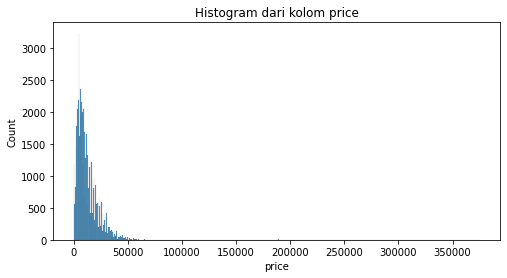

In [39]:
#harga

histogram(dataframe=vehicles_data, column='price')

<AxesSubplot:xlabel='price'>

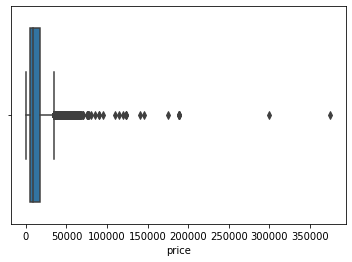

In [40]:
sns.boxplot(vehicles_data['price'])

In [41]:
vehicles_data['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

Variable price terdapat data yang tersebar dari range 0 - 500.000 memiliki outliers hingga 350.000, dan untuk nilai rata - ratanya harga mobil dijual 12.000, dan 50% mobil dijual dengan harga 9.000.

Terlihat dari data diatas bahwasannya jarang dijualnya mobil dengan harga tinggi, dan rata - rata mobil yang dijual di website yaitu dengan harga 12.000. Jika ingin menjual mobil dengan cepat dapat dijual dengan harga jual dibawah rata - rata.



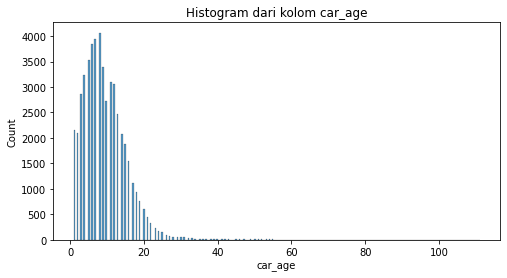

In [42]:
#car_age
histogram(dataframe=vehicles_data, column='car_age')

<AxesSubplot:xlabel='car_age'>

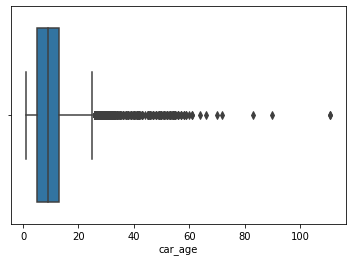

In [43]:
sns.boxplot(vehicles_data['car_age'])

In [44]:
vehicles_data['car_age'].describe()

count    51525.000000
mean         9.513906
std          6.112976
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max        111.000000
Name: car_age, dtype: float64

Terlihat pada data "car_age"diatas bahwasannya, rata- rata mobil bekas yang dijual pada iklan tersebut berumur 8 tahun. Dan dari sebaran data yang ada dari range 0 - 20 terdapat outliers hingga 110. Dan umur mobil yang mendominasi dijual pada iklan tersebut adalah umur mobil yang usia nya telah 12 tahun. 


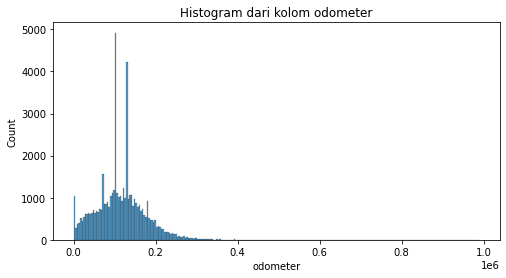

In [45]:
#odometer
histogram(dataframe=vehicles_data, column='odometer')

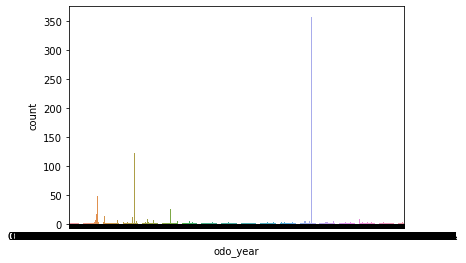

In [46]:
sns.countplot(data=vehicles_data, x='odo_year')
plt.show()

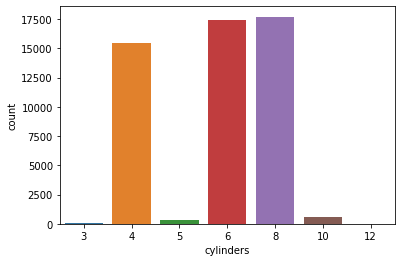

In [47]:
#cylinders
sns.countplot(data=vehicles_data, x='cylinders')
plt.show()


Dapat dilihat dari data diatas bahwasannya mobil yang dijual di website ialah mobil yang memiliki cylinder 4,6, dan 8. Dan sangat jarang mobil bekas dijual  dengan cylinder 3,5, dan 10 dan dengan cylinders 3,5, dan 10 terdapat kemungkinan mobil tersebut adalah mobil langka.

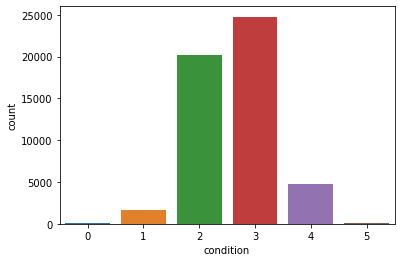

In [48]:
sns.countplot(data=vehicles_data, x='condition')
plt.show()

## Mempelajari dan Menangani Outlier <a id='handle_outliers'></a>


Tentukan batas outlier, hapus outlier, dan simpan di DataFrame yang terpisah, lalu lanjutkan perkerjaan Anda dengan data yang telah difilter.

dari langkah 1.6 diketahui bahwa yang ada outliers itu kolom price, odometer. maka ditahapan ini 2 kolom tsb akan di hapus outliersnya, dll, dll, dst, dst.

In [49]:
# Tentukan batas bawah outlier price
Q1_price = vehicles_data['price'].quantile(0.25)
Q3_price = vehicles_data['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
price_lower = Q1_price - 1.5*IQR_price

In [50]:
# Tentukan batas atas outlier price
price_upper = Q3_price + 1.5*IQR_price

In [51]:
# Tentukan batas bawah outlier odo_year
Q1_odo_year = vehicles_data['odo_year'].quantile(0.25)
Q3_odo_year = vehicles_data['odo_year'].quantile(0.75)
IQR_odo_year = Q3_odo_year - Q1_odo_year
odo_year_lower = Q1_odo_year - 1.5*IQR_odo_year

In [52]:
# Tentukan batas atas outlier odo_year
odo_year_upper = Q3_odo_year + 1.5*IQR_odo_year

In [53]:
#Tentukan batas bawah outlier car_age
Q1_car_age = vehicles_data['car_age'].quantile(0.25)
Q3_car_age = vehicles_data['car_age'].quantile(0.75)
IQR_car_age = Q3_car_age - Q1_car_age
car_age_lower = Q1_car_age - 1.5*IQR_car_age

In [54]:
#Tentukan batas atas outlier car_age
car_age_upper = Q3_car_age + 1.5*IQR_car_age

In [55]:
#Tentukan batas bawah outlier condition
Q1_condition = vehicles_data['condition'].quantile(0.25)
Q3_condition = vehicles_data['condition'].quantile(0.75)
IQR_condition = Q3_condition - Q1_condition
condition_lower = Q1_condition - 1.5*IQR_condition

In [56]:
#Tentukan batas atas outlier condition
condition_upper = Q3_condition + 1.5*IQR_condition

In [57]:
#Tentukan batas bawah outlier cylinders
Q1_cylinders = vehicles_data['cylinders'].quantile(0.25)
Q3_cylinders = vehicles_data['cylinders'].quantile(0.75)
IQR_cylinders = Q3_cylinders - Q1_cylinders
cylinders_lower = Q1_cylinders - 1.5*IQR_cylinders

In [58]:
#Tentukan batas atas outlier cylinders
cylinders_upper = Q3_cylinders + 1.5*IQR_cylinders

In [59]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
# membersihkan outlier kolom 'price'
clean_vehicles_data = vehicles_data.query('price >= @price_lower and price <= @price_upper')

# membersihkan outlier kolom 'car_age'
clean_vehicles_data = clean_vehicles_data.query('car_age >= @car_age_lower and car_age <= @car_age_upper')

# membersihkan outlier kolom 'odo_year'
clean_vehicles_data = clean_vehicles_data.query('odo_year >= @odo_year_lower and odo_year <= @odo_year_upper')

# membersihkan outlier kolom 'condition'
clean_vehicles_data = clean_vehicles_data.query('condition >= @condition_lower and condition <= @condition_upper')

# membersihkan outlier kolom 'odo_year'
clean_vehicles_data = clean_vehicles_data.query('cylinders >= @cylinders_lower and cylinders <= @cylinders_upper')

# informasi dataframe terbaru setelah cleanup
clean_vehicles_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 46357 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           46357 non-null  float64       
 1   model_year      46357 non-null  int64         
 2   model           46357 non-null  object        
 3   condition       46357 non-null  int64         
 4   cylinders       46357 non-null  int64         
 5   fuel            46357 non-null  object        
 6   odometer        46357 non-null  float64       
 7   transmission    46357 non-null  object        
 8   type            46357 non-null  object        
 9   paint_color     46357 non-null  object        
 10  is_4wd          46357 non-null  bool          
 11  date_posted     46357 non-null  datetime64[ns]
 12  days_listed     46357 non-null  int64         
 13  day_posted      46357 non-null  int64         
 14  month_posted    46357 non-null  int64         
 15  ye

In [60]:
def upper_lower_whisker(series):
    Q1  = series.quantile(0.25)
    Q3  = series.quantile(0.75)

    IQR = Q3 - Q1

    lower_whisker = IQR - (1.5 * IQR)
    upper_whisker = IQR + (1.5 * IQR)

    return lower_whisker, upper_whisker

In [61]:
def outlier_cleansing(dataframe, column):

    lower, upper = upper_lower_whisker(dataframe[column])
    print(f'lower values : {lower}')
    print(f'upper values : {upper}')

    plt.title('Before cleaning outlier!')
    sns.boxplot(data=dataframe, x=column)
    plt.show()

    dataframe = dataframe[(dataframe[column] > lower) & (dataframe[column] < upper)]

    lower_check, upper_check = upper_lower_whisker(dataframe[column])
    print(f'lower_check values : {lower_check}')
    print(f'upper_check values : {upper_check}')

    plt.title('After cleaning outlier!')
    sns.boxplot(data=dataframe, x=column)
    plt.show()
    
    return dataframe

#     if lower == lower_check or upper == upper_check:
#         print(f'\n====== [FINISHED] outlier in [{column}] column has been clear! ====== \n')
#         return dataframe

#     else:
#         print(f'\n------ [RE-START] cleaning outlier in {column} column ------ \n')
#         dataframe = outlier_cleansing(dataframe=dataframe, column=column)
#         return dataframe


====== [START] cleaning outlier in price column ====== 

lower values : -5919.5
upper values : 29597.5


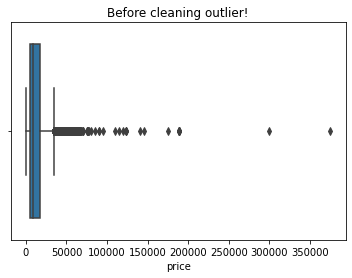

lower_check values : -5000.0
upper_check values : 25000.0


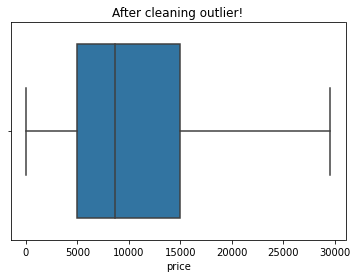


====== [START] cleaning outlier in odo_year column ====== 

lower values : -4255.9375
upper values : 21279.6875


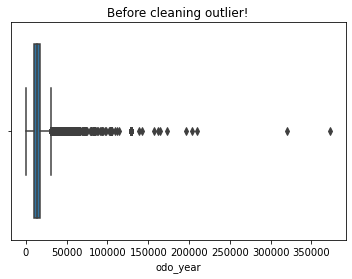

lower_check values : -3250.7958333333318
upper_check values : 16253.979166666662


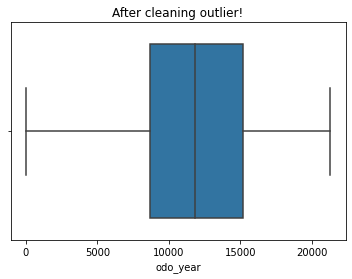


====== [START] cleaning outlier in car_age column ====== 

lower values : -3.5
upper values : 17.5


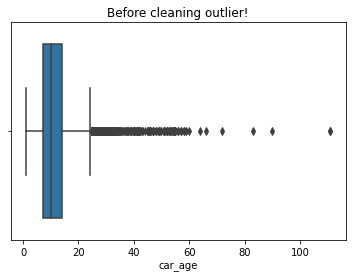

lower_check values : -3.0
upper_check values : 15.0


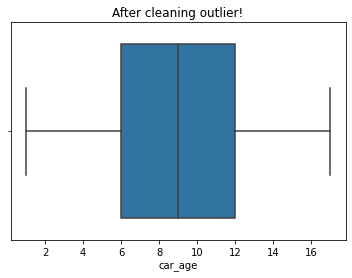


====== [START] cleaning outlier in cylinders column ====== 

lower values : -2.0
upper values : 10.0


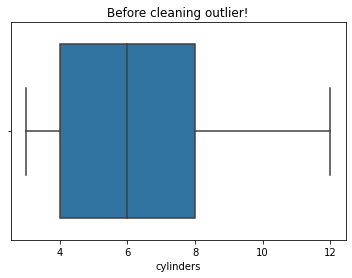

lower_check values : -2.0
upper_check values : 10.0


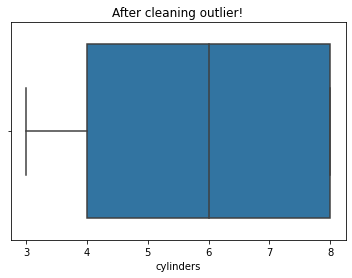

In [62]:
vehicles_data_final = vehicles_data.copy()
list_of_selected_column = ['price', 'odo_year', 'car_age' ,'cylinders']

for column in list_of_selected_column:
    print(f'\n====== [START] cleaning outlier in {column} column ====== \n')
    vehicles_data_final = outlier_cleansing(dataframe=vehicles_data_final, column=column)

Setelah menangani outlier sekarang jumlah data yang di miliki berkurang menjadi `46357` data

## Mempelajari Parameter Inti Tanpa Outlier <a id='without_outliers'></a>

Text(0.5, 0, 'in USD')

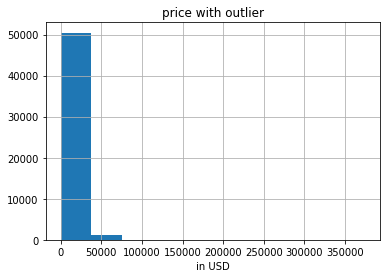

In [63]:
#kolom price dengan outlier
vehicles_data[['price']].hist(bins=10)
plt.title('price with outlier')
plt.xlabel('in USD')

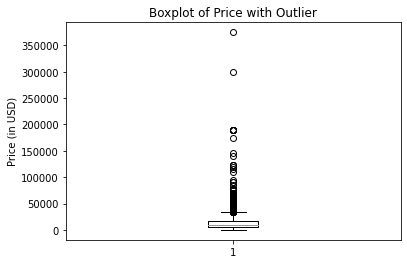

In [64]:
# Membuat boxplot untuk kolom 'price' dengan outlier
plt.boxplot(vehicles_data['price'])
plt.title('Boxplot of Price with Outlier')
plt.ylabel('Price (in USD)')
plt.show()

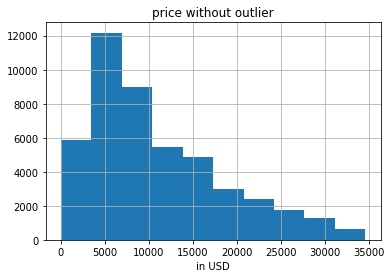

In [65]:
#kolom price tanpa outlier

clean_vehicles_data[['price']].hist(bins=10)
plt.title('price without outlier')
plt.xlabel('in USD')

plt.show()

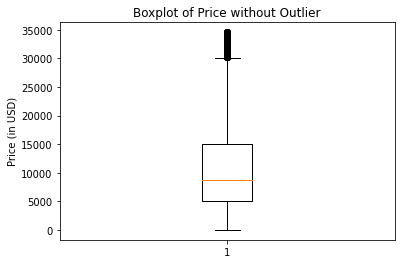

In [66]:
#membuat bloxpot untuk kolom'price' tanpa outlier

plt.boxplot(clean_vehicles_data['price'])
plt.title('Boxplot of Price without Outlier')
plt.ylabel('Price (in USD)')
plt.show()

Dapat kita lihat dari data diatas bahwasannya mobil yang laku terjual pada iklan mayoritas dengan harga kisaran 5000 USD, sedangkan harga mobil kisaran 3000 USD hingga 35000 USD cukup sedikit yang terjual.

Text(0.5, 0, 'Car_age(in years)')

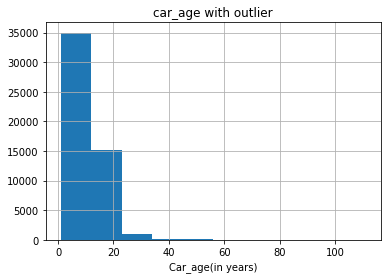

In [67]:
#kolom car age dengan outlier
vehicles_data[['car_age']].hist(bins=10)
plt.title('car_age with outlier')
plt.xlabel('Car_age(in years)')

<function matplotlib.pyplot.show(close=None, block=None)>

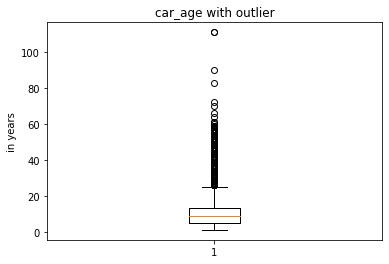

In [68]:
#membuat boxplot untuk kolom'car_age' dengan outlier

plt.boxplot(vehicles_data['car_age'])
plt.title('car_age with outlier')
plt.ylabel('in years')
plt.show

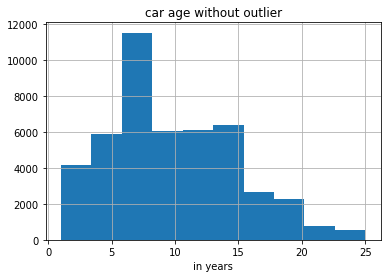

In [69]:
#kolom car age tanpa outlier
clean_vehicles_data[['car_age']].hist(bins=10)
plt.title('car age without outlier')
plt.xlabel('in years')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

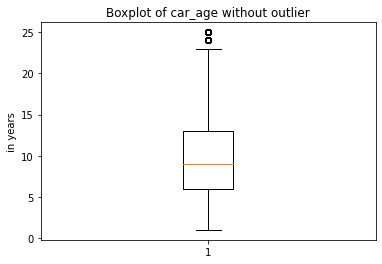

In [70]:
#membuat boxplot untuk kolom'car_age' tanpa outlier

plt.boxplot(clean_vehicles_data['car_age'])
plt.title('Boxplot of car_age without outlier')
plt.ylabel('in years')
plt.show

Dapat dilihat dari gambar histogram diatas bahwasannya data sebelumnya bisa memiliki umur `100 tahun` tapi data yang sekarang memiliki data bersih hanya memiliki rentang sampai `25 tahun`

Text(0.5, 0, 'in meters')

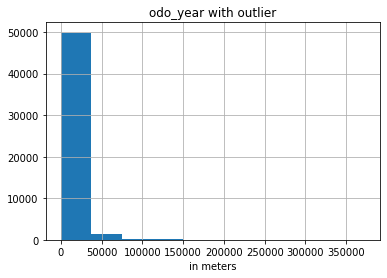

In [71]:
#kolom odo_year dengan outlier

vehicles_data[['odo_year']].hist(bins=10)
plt.title('odo_year with outlier')
plt.xlabel('in meters')

<function matplotlib.pyplot.show(close=None, block=None)>

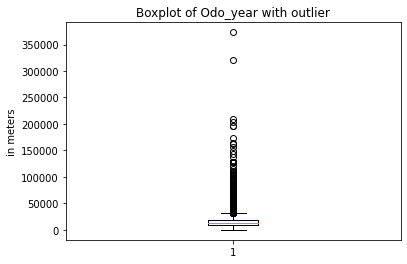

In [72]:
#membuat boxplot untuk kolom'odo_year' dengan outlier

plt.boxplot(vehicles_data['odo_year'])
plt.title('Boxplot of Odo_year with outlier')
plt.ylabel('in meters')
plt.show

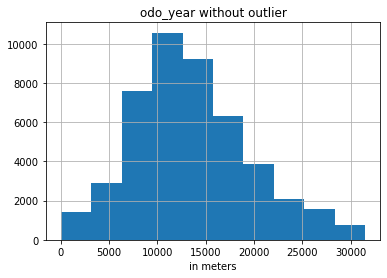

In [73]:
#kolom odo_year tanpa outlier

clean_vehicles_data[['odo_year']].hist(bins=10)
plt.title('odo_year without outlier')
plt.xlabel('in meters')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

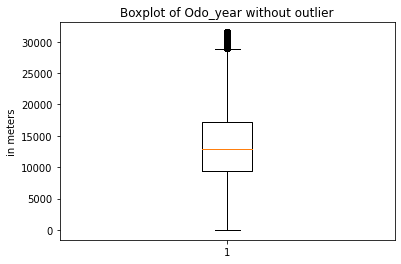

In [74]:
#membuat boxplot untuk kolom 'odo_year' tanpa outlier

plt.boxplot(clean_vehicles_data['odo_year'])
plt.title('Boxplot of Odo_year without outlier')
plt.ylabel('in meters')
plt.show

Dapat dilihat dari data iklan diatas bahwasannya dengan mobil yang memiliki odo_year  kisaran 1000 - 15000 lebih laku terjual. Dan mobil yang memiliki odo_year kisaran 25000 - 3000 cukup sedikit terjual.

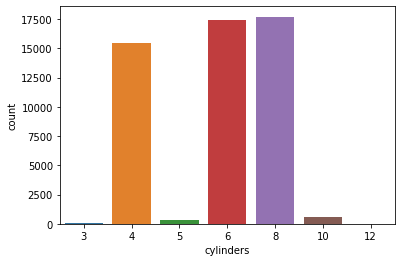

In [75]:
#kolom cylinders

sns.countplot(data=vehicles_data, x='cylinders')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

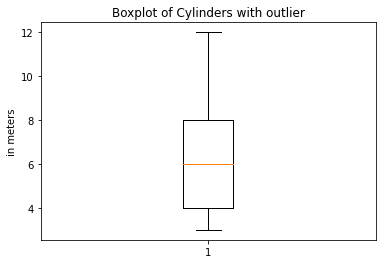

In [76]:
#membuat boxplot untuk kolom'cylinders'

plt.boxplot(vehicles_data['cylinders'])
plt.title('Boxplot of Cylinders with outlier')
plt.ylabel('in meters')
plt.show

Mobil yang paling banyak terjual di website ialah mobil yang memiliki cylinders 4, 6, dan 8 sedangkan mobil yang sangat jarang terjual di website ialah mobil yang memiliki cylinders 3, 5 dan 10 .


Ada kemungkinan bahwsannya mobil dengan cylinders 3,5, dan 10 adalah mobil langka dan mobil tersebut cukup sulit terjual.

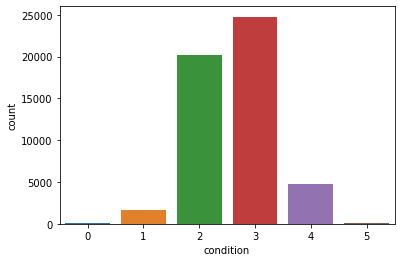

In [77]:
#kolom condition

sns.countplot(data=vehicles_data, x='condition')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

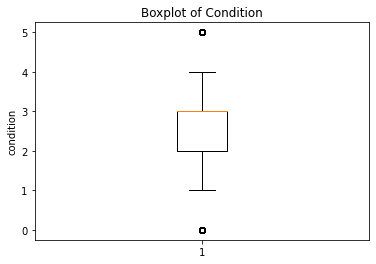

In [78]:
#membuat boxplot untuk kolom'condition' dengan outlier

plt.boxplot(vehicles_data['condition'])
plt.title('Boxplot of Condition')
plt.ylabel('condition')
plt.show

Terlihat dari data bar chart diatas bahwsannya mobil dengan kondisi 2`good` dan 3`excellent` cukup banyak terjual sedangkan kondisi 1`fair`,4`like new` dan 5`new` sangat sedikit terjual. Mungkin para customer yang membeli mobil di iklan ini lebih berminat membeli mobil dengan harga yang tidak terlalu mahal tetapi dengan kondisi yang `good` dan `excellent` dibandingkan dengan mobil yang kondisi nya `like new` dan `new` tetapi dengan harga normal atau cukup tinggi. 

**Kesimpulan**
1. Kolom `price` tanpa outliers mengalami pengurangan range data yang sangat significat yaitu pada `0-35000 USD` dan terlihat lebih jelas frekuensi harga yang paling banyak diiklankan .
2. kolom `car age` sekarang memiliki rentang sampai `25 tahun` dan terlihat bahwa kendaraan yang cukup sering diikanlan terletak pada rentang umur tersebut.
3. kolom `odo_year` memiliki outliers yang sangat jauh sehingga sekarang hanya memiliki rentang `25000 meter`.
4. kolom ` cylinders` dapat diambil kesimpulan mobil terjual di website ialah mobil yang memiliki cylinders 4, 6, dan 8 sedangkan mobil yang sangat jarang terjual di website ialah mobil yang memiliki cylinders 3, 5 dan 10 .
5. kolom `condition` dapat diambil kesimpulan bahwasannya bahwsannya mobil dengan kondisi 2`good` dan 3`excellent` cukup banyak terjual sedangkan kondisi 1`fair`,4`like new` dan 5`new` sangat sedikit terjual. 


## Masa Berlaku Iklan <a id='ad_validty_period'></a>
Pelajari berapa hari iklan ditayangkan (`days_listed`). Hitung rata-rata dan mediannya. Jelaskan berapa lama umumnya sebuah iklan ditayangkan. Tentukan kapan iklan dihapus dengan cepat dan kapan iklan ditayangkan dalam waktu yang sangat lama.

In [79]:
print('Minimum durasi listing:', vehicles_data['days_listed'].min())
print('Median durasi listing :', vehicles_data['days_listed'].median())
print('Mean durasi listing   :', vehicles_data['days_listed'].mean())
print('Maximum durasi listing:', vehicles_data['days_listed'].max())

Minimum durasi listing: 0
Median durasi listing : 33.0
Mean durasi listing   : 39.55475982532751
Maximum durasi listing: 271


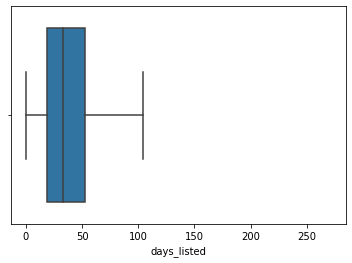

In [80]:
sns.boxplot(data=vehicles_data, x='days_listed', fliersize=0)
plt.show()

Dapat kita lihat pada data diatas bahwasannya pada umumnya sebuah iklan ditayangkan sekitar 33 sampai 39 hari, untuk iklan yang dihapus dengan cepat biasanya memiliki durasi listing di bawah median yaitu kurang dari 33 hari.Sedangkan iklan ditayangkan dengan waktu yang sangat lama memiliki durasi listing yang jauh di atas rata-rata dan median yaitu 100 hari. 

Dan dapat dilihat bahwasannya mobil dapat laku sebelum listing dimulai, ada juga mobil yang belum laku hingga 271 hari, dan terakhir ialah mobil dikatakan sangat lama laku terjual ketika hingga 100 hari belum terjual  

## Harga Rata-Rata Setiap Jenis Kendaraan <a id='average_price'></a>

Lakukan analisis pada jumlah iklan dan harga rata-rata untuk setiap jenis kendaraan. Buat sebuah grafik yang menunjukkan ketergantungan jumlah iklan pada jenis kendaraan. Pilih dua jenis kendaraan dengan jumlah iklan yang paling banyak.

Dapat dilihat dari data diatas bahwasannya dua jenis kendaraan yang memiliki paling banyak iklan ialah SUV dan truck

In [81]:
price_type_pivot = clean_vehicles_data.pivot_table(index='type', values='price', aggfunc=['count', 'mean'])
price_type_pivot.columns = ['Ads', 'Price']
price_type_pivot.sort_values('Ads', ascending=False)

,Ads,Price
type,,
SUV,11492,10177.152628
sedan,11346,6723.801340
truck,10646,14564.228630
pickup,6073,14402.515067
coupe,1943,12993.689141
wagon,1480,8744.266216
mini-van,1089,7642.184573
hatchback,973,6642.021583
van,548,8342.978102


,ads,mean_price
type,,
SUV,11492,10177.152628
sedan,11346,6723.801340
truck,10646,14564.228630
pickup,6073,14402.515067
coupe,1943,12993.689141
wagon,1480,8744.266216
mini-van,1089,7642.184573
hatchback,973,6642.021583
van,548,8342.978102


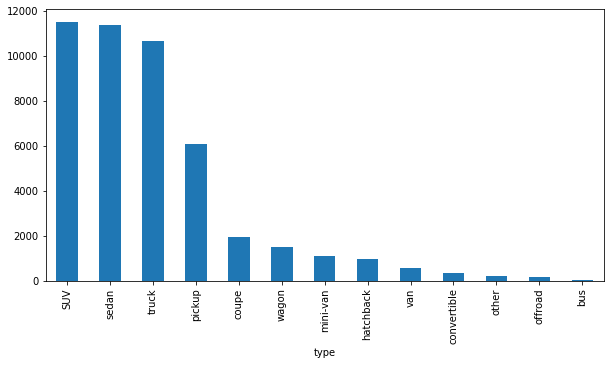

In [82]:
report = (clean_vehicles_data.groupby(['type']).agg({'model': 'count', 'price': 'mean'})
                       .rename(columns = {'model': 'ads', 'price': 'mean_price'})
                       .sort_values(by = 'ads', ascending = False))
report.head(25)['ads'].plot(kind = 'bar', figsize = (10,5))
report

## Faktor Harga <a id='price_factor'></a>

Apakah faktor yang paling memengaruhi harga kendaraan?
Ambil masing-masing jenis kendaraan populer yang kamu temukan pada tahap sebelumnya dan pelajari apakah harganya bergantung pada usia, jarak tempuh, kondisi, tipe transmisi, dan warnanya. Buat grafik boxplot untuk variabel kategorik (jenis transmisi dan warna), lalu buat scatterplot untuk sisanya. Ketika menganalisis variabel kategorik, ingat bahwa kategori harus memiliki setidaknya 50 iklan. Jika tidak, parameternya tidak akan valid untuk digunakan saat analisis.

### Faktor Harga Mobil Sedan

In [83]:
# memfilter data untuk mobil sedan
sedan_data = clean_vehicles_data.query('type == "sedan"')
sedan_data = sedan_data[['price','car_age','odometer','condition','transmission','paint_color']]


In [84]:
sedan_data['transmission'].value_counts()

automatic    10666
manual         564
other          116
Name: transmission, dtype: int64

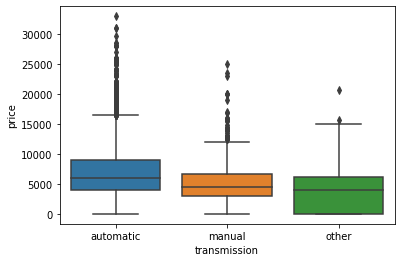

In [85]:
for column in sedan_data.columns:
    # pengkondisian kategori
    if column == 'transmission':
        # membuat dataframe penampungan data terfilter
        filter_sedan_transmission = pd.DataFrame()
        for unik_t_sedan in sedan_data['transmission'].unique():
            # menghitung data kategorik yang jumlah iklanya minimal 50
            if sedan_data.query('transmission == @unik_t_sedan')['transmission'].count() >= 50:
                # memfilter data kategorik
                sedan_transmission = sedan_data.query('transmission == @unik_t_sedan')
                # menggabungkan data ke dataframe tampungan
                filter_sedan_transmission = pd.concat([filter_sedan_transmission,sedan_transmission]).reset_index(drop=True)
        # membuat grafik boxplot
        sns.boxplot(data=filter_sedan_transmission,x=column,y='price')
        plt.show()


Dapat dilihat dari data diatas bahwasannya transmisi sebuah kendaraan mempengaruhi harga jual, dan transmisi mobil sedan autometic memiliki harga yang tinggi, dibandingkan transmisi manual.

In [86]:
sedan_data['paint_color'].value_counts()

unknown    2047
silver     1909
black      1645
grey       1523
white      1381
blue       1169
red         897
custom      270
brown       250
green       198
purple       26
yellow       22
orange        9
Name: paint_color, dtype: int64

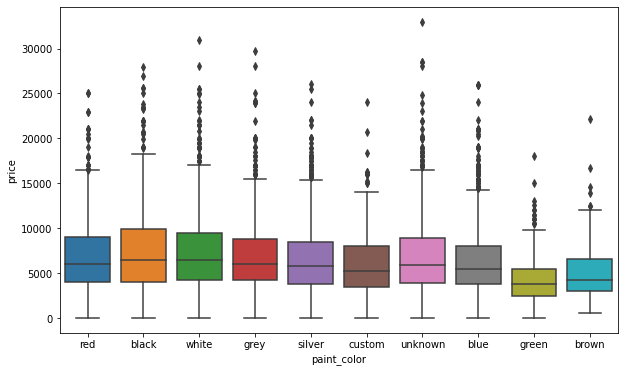

In [87]:
for column in sedan_data.columns:    
    # pengkondisian kategori
    if column == 'paint_color':
        # membuat dataframe penampungan data terfilter
        filter_sedan_color = pd.DataFrame()
        for unik_c_sedan in sedan_data['paint_color'].unique():
            # menghitung data kategorik yang jumlah iklanya minimal 50
            if sedan_data.query('paint_color == @unik_c_sedan')['paint_color'].count() >= 50:
                # memfilter data kategorik
                sedan_color = sedan_data.query('paint_color == @unik_c_sedan')
                # menggabungkan data ke dataframe tampungan
                filter_sedan_color = pd.concat([filter_sedan_color,sedan_color]).reset_index(drop=True)
        # membuat grafik boxplot
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=filter_sedan_color,x=column,y='price')
        plt.show()
    


Dikarenakan pada tahap mengatasi nilai hilang pada kolom `paint_color` diatasi dengan variable unknown oleh karena itu untuk analisa data ini variable unkown akan diabaikan. Dan terlihat warna tidak terlalu berpengaruh dengan harga. Tetapi ada kecenderungan beberapa warna seperti `white`, `black`, dan `grey`. Dan harga yang murah adalah mobil sedang berwarna `green` dan `brown`.

Ada kemungkinan customer yang membeli mobil keluarga dengan jenis sedan ini mayoritas adalah warna - warna yang netral seperti hitam, putih, dan abu - abu.Dan ada kemungkinan juga warna netral tersebut harga nya mahal dikarenakan mobil sedan dengan warna netral banyak diminati. 


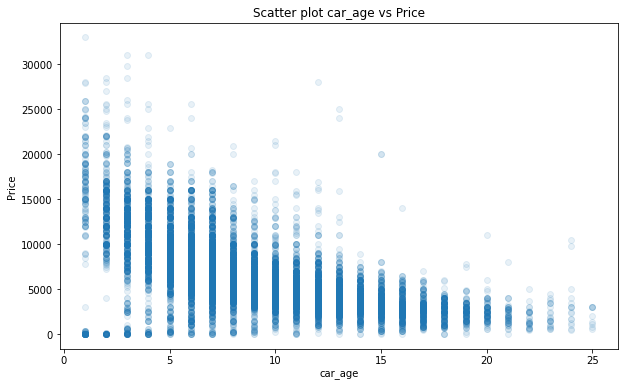

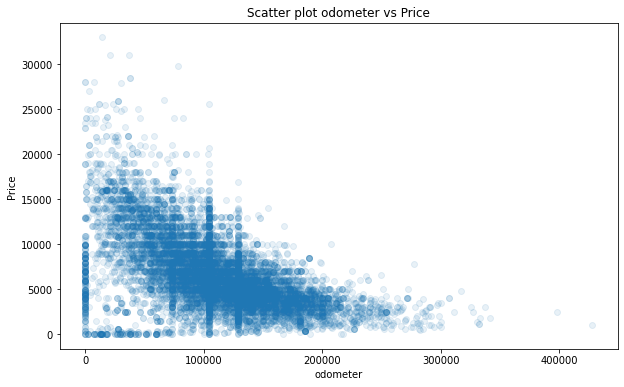

In [88]:
for column in sedan_data.columns:
    if column in ['car_age', 'odometer', 'conditions']:
        # Membuat grafik scatter plot untuk data numerik
        plt.figure(figsize=(10, 6))
        plt.scatter(data=sedan_data, x=column, y='price', alpha=0.1)
        plt.title(f"Scatter plot {column} vs Price")
        plt.xlabel(column)
        plt.ylabel("Price")
        plt.show()

Dapat diambil kesimpulan dari gambar scatterplot diatas :
1. `price` dan `car_age` memiliki korelasi linier secara negatif dikarenakan dengan umur mobil yang makin tua harga jual pun akan makin turun.
2. `price` dan `odometer` memiliki korelasi linier secara negatif dikarenakan dengan odometer mobil yang makin tinggi, harga jual pun akan makin menurun.
3. `price` dan `condition` tidak memiliki korelasi linier terhadap satu sama lain, akan tetapi ada kemungkinan faktor kondisi mobil sedan ini akan mempengaruhi harga jual. Untuk mobil sedan dengan kondisi `3` lebih banyak, oleh karena itu untuk variasi harga nya cukup banyak.

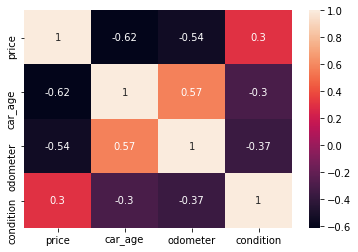

In [89]:
#matriks korelasi
# membuat tabel korelasi harga untuk mobil sedan
corr_sedan = sedan_data[['price','car_age','odometer','condition']].corr()
sns.heatmap(corr_sedan,annot=True)
plt.show()

Dari data matriks korelasi diatas dapat dilihat bahwasannya, untuk `car_age` dan `odometer`berkorelasi negatif terhadap `price`. Sedangkan untuk `condition` berkorelasi positif.

### Faktor Harga Mobil SUV <a id='price_factor_SUV'></a>

In [90]:
# memfilter data untuk mobil SUV
suv_data = clean_vehicles_data.query('type == "SUV"')
suv_data = suv_data[['price','car_age','odometer','condition','transmission','paint_color']]

In [91]:
suv_data['transmission'].value_counts()

automatic    10884
manual         459
other          149
Name: transmission, dtype: int64

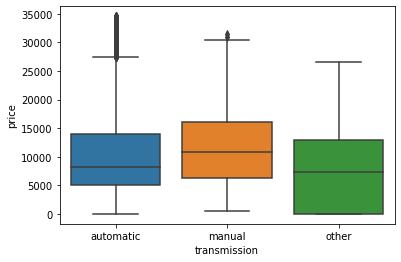

In [92]:
for column in suv_data.columns:
    # pengkondisian kategori
    if column == 'transmission':
        # membuat dataframe penampungan data terfilter
        filter_suv_transmission = pd.DataFrame()
        for unik_t_suv in suv_data['transmission'].unique():
            # menghitung data kategorik yang jumlah iklanya minimal 50
            if suv_data.query('transmission == @unik_t_suv')['transmission'].count() >= 50:
                # memfilter data kategorik
                suv_transmission = suv_data.query('transmission == @unik_t_suv')
                # menggabungkan data ke dataframe tampungan
                filter_suv_transmission = pd.concat([filter_suv_transmission,suv_transmission]).reset_index(drop=True)
        # membuat grafik boxplot
        sns.boxplot(data=filter_suv_transmission,x=column,y='price')
        plt.show()


Dapat di lihat dari gambar boxplot diatas bahwasannya mobil SUV yang menggunakan transmisi manual harga nya lebih tinggi. 

In [93]:
suv_data['paint_color'].value_counts()

unknown    2057
black      2016
white      1786
silver     1476
grey       1095
blue        977
red         853
green       424
brown       359
custom      291
orange       77
yellow       42
purple       39
Name: paint_color, dtype: int64

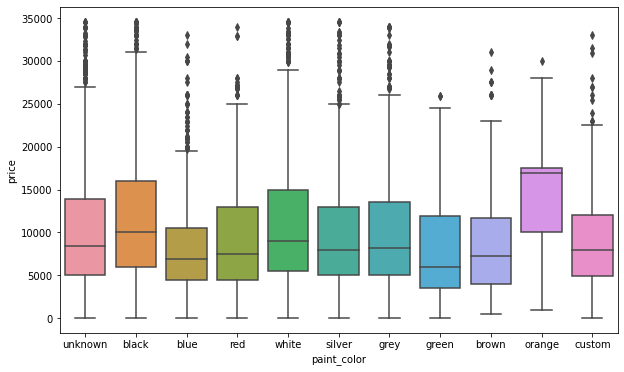

In [94]:
for column in suv_data.columns:    
    # pengkondisian kategori
    if column == 'paint_color':
        # membuat dataframe penampungan data terfilter
        filter_suv_color = pd.DataFrame()
        for unik_c_suv in suv_data['paint_color'].unique():
            # menghitung data kategorik yang jumlah iklanya minimal 50
            if suv_data.query('paint_color == @unik_c_suv')['paint_color'].count() >= 50:
                # memfilter data kategorik
                suv_color = suv_data.query('paint_color == @unik_c_suv')
                # menggabungkan data ke dataframe tampungan
                filter_suv_color = pd.concat([filter_suv_color,suv_color]).reset_index(drop=True)
        # membuat grafik boxplot
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=filter_suv_color,x=column,y='price')
        plt.show()
    


Terlihat dari gambar boxplot diatas mobil jenis `SUV` memiliki variasi harga yang lebih merata.
1. mobil dengan warna `black`, `red`, `white`, `silver`, `grey` memiliki harga jual yang tinggi
2. mobil dengan warna `green` cenderung memiliki harga lebih rendah
3. jumlah iklan warna `black`, `white`, `silver` dan `grey` memiliki jumlah iklan lebih banyak ada kemungkinan kebutuhan untuk mobil SUV adalah yang memiliki warna netral jadi kecenderungan untuk dijual menjadi lebih banyak sehingga harga nya pun menjadi sangat bervariasi.

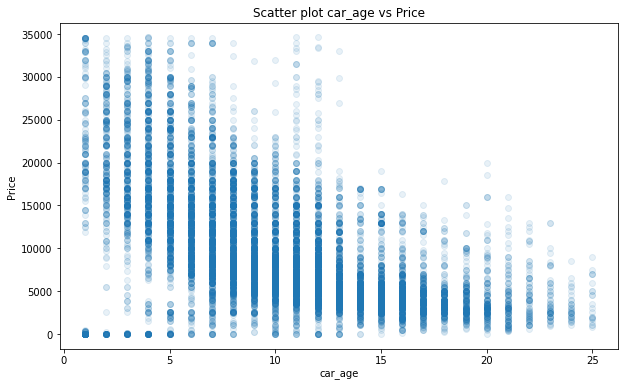

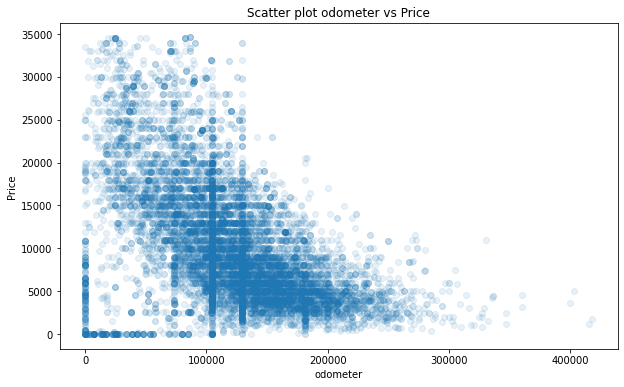

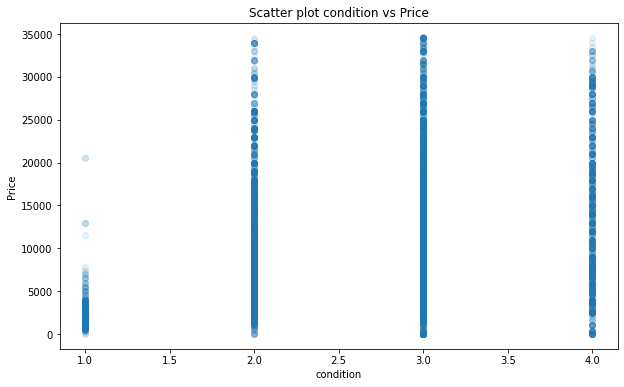

In [95]:
for column in suv_data.columns:
    if column in ['car_age', 'odometer', 'condition']:
        # Membuat grafik scatter plot untuk data numerik
        plt.figure(figsize=(10, 6))
        plt.scatter(data=suv_data, x=column, y='price', alpha=0.1)
        plt.title(f"Scatter plot {column} vs Price")
        plt.xlabel(column)
        plt.ylabel("Price")
        plt.show()

Dari gambar scatterplot pada data mobil suv dapat diketahui:
1. `price` dan `car_age` memiliki korelasi linear secara negatif kemungkinan dikarenakan semakin lama umur suatu kendaraan maka harga kendaraan tersebut menurun.
2. `price` dan `odometer` memiliki korelasi linear secara negatif dikarenakan penggunaan dan jarak tempuh yang panjang maka harga kendaraan tersebut akan lebih murah.
3. `price` dan `condition` tidak memiliki korelasi linear terhadap satu sama lain, akan tetapi memungkinan bahwa variabel ini mempengaruhi harga jual kendaraan SUV, hanya saja karna jumlah penjualan untuk kondisi `3` yang banyak sehingga variasi harga jualnya menjadi lebih banyak daripada variabel lainnya.

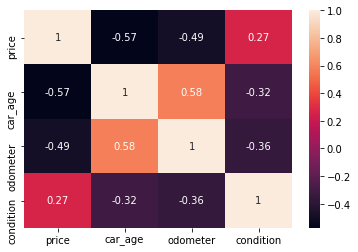

In [96]:
#Matriks korelasi
# membuat tabel korelasi harga untuk kendaraan mobil suv
corr_suv = suv_data[['price','car_age','odometer','condition']].corr()
sns.heatmap(corr_suv,annot=True)
plt.show()

Dari gambar matriks diatas, dapat dilihat bahwasannya `price`berkorelasi negatif dengan `car_age`, dan ` odometer`. Dan `price` berkorelasi positif dengan `condition`

<div class="alert alert-success">
<b>Chamdani's comment v.3</b> <a class="tocSkip"></a>

Hebat, Kerja bagus Karlen!

</div>

### Faktor Harga Truck <a id='price_factor_truck'></a>

In [97]:
truck_data = clean_vehicles_data.query('type == "truck"')
truck_data = truck_data[['price','car_age','odometer','condition','transmission','paint_color']]

In [98]:
truck_data['transmission'].value_counts()

automatic    10078
manual         398
other          170
Name: transmission, dtype: int64

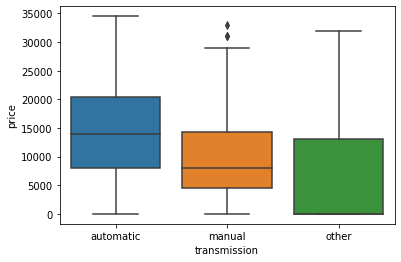

In [99]:
for column in truck_data.columns:
    # pengkondisian kategori
    if column == 'transmission':
        # membuat dataframe penampungan data terfilter
        filter_truck_transmission = pd.DataFrame()
        for unik_t_truck in truck_data['transmission'].unique():
            # menghitung data kategorik yang jumlah iklanya minimal 50
            if truck_data.query('transmission == @unik_t_truck')['transmission'].count() >= 50:
                # memfilter data kategorik
                truck_transmission = truck_data.query('transmission == @unik_t_truck')
                # menggabungkan data ke dataframe tampungan
                filter_truck_transmission = pd.concat([filter_truck_transmission,truck_transmission]).reset_index(drop=True)
        # membuat grafik boxplot
        sns.boxplot(data=filter_truck_transmission,x=column,y='price')
        plt.show()


Terlihat pada gambar boxplot diatas, bahwsannya truck dengan transmisi automatic memiliki harga yang tinggi, dan dapat di ambil kesimpulan bahwasannya sebuah transmisi dapat mempengarhui harga jual.

In [100]:
truck_data['paint_color'].value_counts()

white      3112
unknown    1849
black      1334
red         943
silver      912
grey        810
blue        806
custom      301
green       256
brown       230
orange       45
yellow       34
purple       14
Name: paint_color, dtype: int64

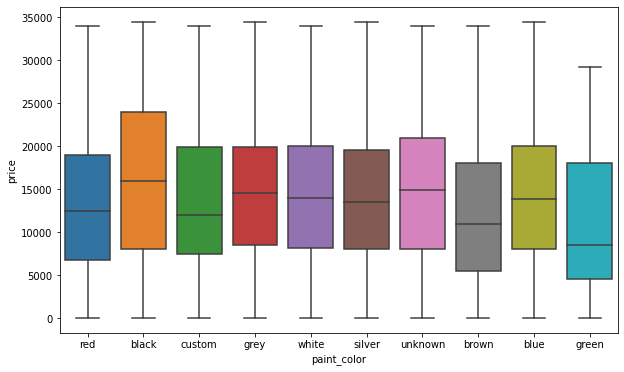

In [101]:
for column in truck_data.columns:    
    # pengkondisian kategori
    if column == 'paint_color':
        # membuat dataframe penampungan data terfilter
        filter_truck_color = pd.DataFrame()
        for unik_c_truck in truck_data['paint_color'].unique():
            # menghitung data kategorik yang jumlah iklanya minimal 50
            if truck_data.query('paint_color == @unik_c_truck')['paint_color'].count() >= 50:
                # memfilter data kategorik
                truck_color = truck_data.query('paint_color == @unik_c_truck')
                # menggabungkan data ke dataframe tampungan
                filter_truck_color = pd.concat([filter_truck_color,truck_color]).reset_index(drop=True)
        # membuat grafik boxplot
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=filter_truck_color,x=column,y='price')
        plt.show()
    


Terlihat dari gambar boxplot diatas bahwasannya sebuah warna kendaraan truck tidak terlalu mempengaruhi harga jual. Akan tetapi warna `black`, `white`, dan `silver`, memiliki jumlah iklan yang banyak dibandingkan dengan warna yang lain.

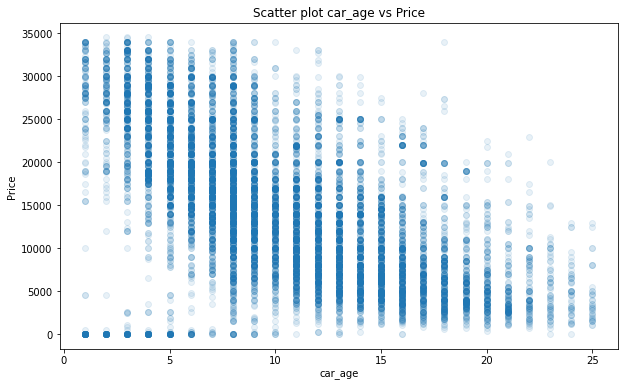

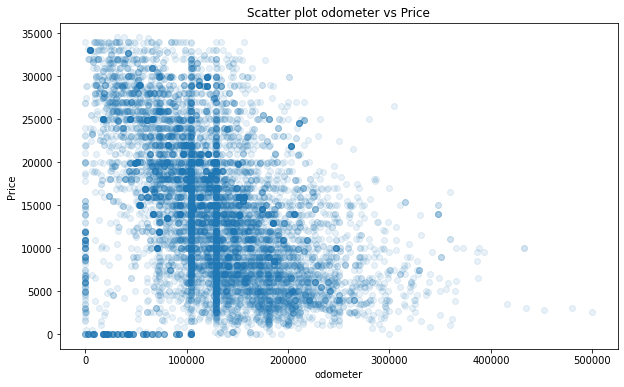

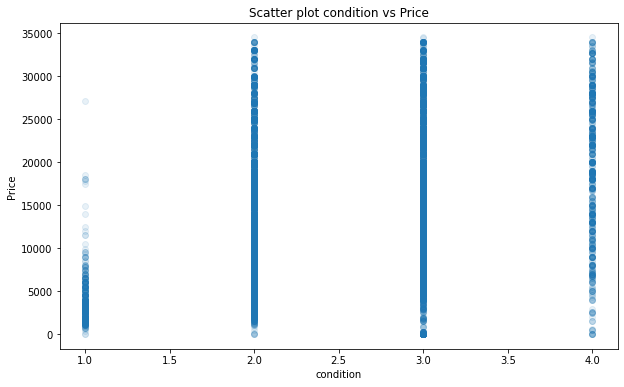

In [102]:
for column in truck_data.columns:
    if column in ['car_age', 'odometer', 'condition']:
        # Membuat grafik scatter plot untuk data numerik
        plt.figure(figsize=(10, 6))
        plt.scatter(data=truck_data, x=column, y='price', alpha=0.1)
        plt.title(f"Scatter plot {column} vs Price")
        plt.xlabel(column)
        plt.ylabel("Price")
        plt.show()

Terlihat dari gambar scatterplot diatas bahwasannya:
1. Faktor `price` dengan ` car_age` memiliki korelasi linier negatif.
2. Faktor `price` dengan `odometer` memiliki korelasi linier negatif.
3. Faktor `price` dengan ` condition` tidak memiliki kolerasi, tetapi ada kemungkinan variabel condition ini mempengarhui harga jual truck hanya pada di konidi 2, 3, dan 4.

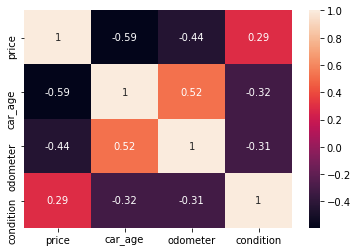

In [103]:
#matriks korelasi
# membuat tabel korelasi harga untuk truck
corr_truck = truck_data[['price','car_age','odometer','condition']].corr()
sns.heatmap(corr_truck,annot=True)
plt.show()

Dapat dilihat dari gambar matriks diatas variabel `price` berkorelasi negatif dengan `car_age`, dan `odometer` sedangkan variable `price` berkorelasi positif dengan ` condition `.|

###  Kendaraan yang Populer <a id='top_vehicles'></a>

In [104]:
top5_vehicles_data = vehicles_data.loc[vehicles_data['type'].isin(['SUV', 'truck', 'sedan', 'pickup', 'coupe']) & (vehicles_data['price'] <= 34597.5)]
top5_vehicles_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,weekday_posted,car_age,odo_year
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,23,6,2018,5,8,18125.000000
1,25500.0,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,19,10,2018,4,8,11088.125000
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,7,2,2019,3,7,15714.285714
3,1500.0,2003,ford f-150,1,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,22,3,2019,4,17,10683.117647
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,4,2019,1,3,26967.666667


In [105]:
top5_vehicles_data[['condition', 'cylinders']] = top5_vehicles_data[['condition', 'cylinders']].astype(str)

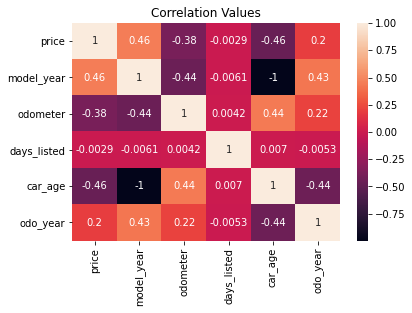

In [106]:
num = top5_vehicles_data[['price', 'model_year', 'odometer', 'days_listed', 'car_age', 'odo_year']]

plt.title('Correlation Values')
sns.heatmap(num.corr(), annot=True)
plt.show()

Dapat dilihat dari data diatas bahwasannya faktor yang mempunyai korelasi dengan harga mobil yaitu model_year dimana nilai korelasi nya adalah 0.46 dimana semakin menambah model_year berarti semakin tinggi harganya tetapi hubungan korelasi nya adalah medium. Lalu faktor yang mempengarhui lainnya ialah semakin tinggi nilai odometer nya akan semakin rendah harga nya dengan nilai korelasi -0.38, untuk faktor car_age semakin lama umur mobil akan semakin rendah harga mobil tersebut untuk nilai korelasi nya ialah -0.46, dan faktor terakhir yang berkorelasi dengan price adalah odo_year dimana semakin tinggi nilai odo_year akan semakin tinggi pula nilai harganya.

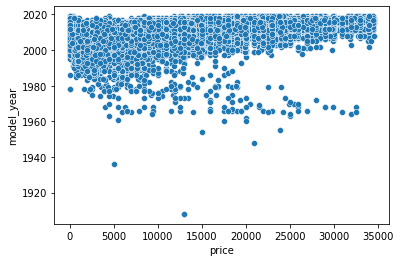

In [107]:
sns.scatterplot(data=num, x='price', y='model_year')
plt.show()

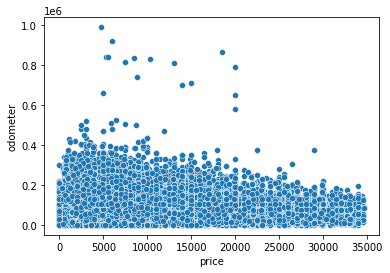

In [108]:
sns.scatterplot(data=num, x='price', y='odometer')
plt.show()

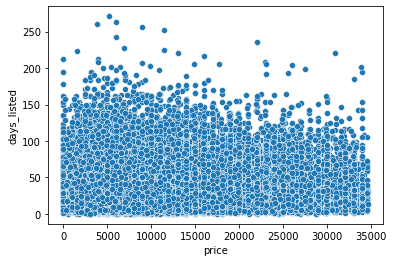

In [109]:
sns.scatterplot(data=num, x='price', y='days_listed')
plt.show()

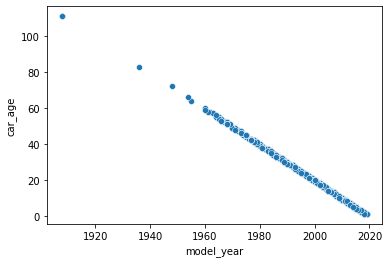

In [110]:
sns.scatterplot(data=num, x='model_year', y='car_age')
plt.show()

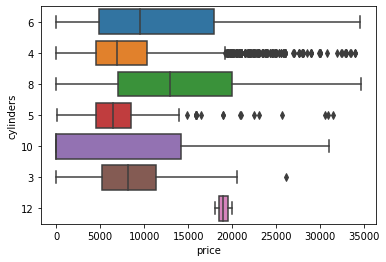

In [111]:
sns.boxplot(data=top5_vehicles_data, x='price', y='cylinders')
plt.show()

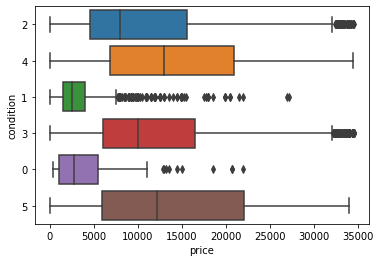

In [112]:
sns.boxplot(data=top5_vehicles_data, x='price', y='condition')
plt.show()



**Kendaran Sedan**
1. Pada kendaraan mobil keluarga jenis `sedan` ini yang menggunakan transimisi automatic harga nya lebih tinggi.
2. Untuk mobil sedan warna `white`, `black`, dan`grey` cukup banyak peminat nya dan warna - warna tersebut memiliki harga yang lebih tinggi dibandingkan dengan warna mobil sedan yang lainnya.
3. Kolom `car_age` pada kendaraan `sedan`ini mempengaruhi harga jual, dengan usia mobil `sedan` yang usia nya lebih rendah cenderung memiliki harga jual yang tinggi daripada usia kendaraan yang lebih tua.
4. Kolom`odometer` pada kendaraan `sedan` ini juga mempengarhui harga jual, dengan jarak tempuh yang lebih dekat cenderung memiliki harga jual yang tinggi daripada kendaraan yang memiliki jarak tempuh yang jauh.
5. Kolom `condition` pada kendaraan `sedan` tidak terlalu mempengaruhi harga jual.



**Kendaraan SUV**

1. Kendaraan mobil jenis `SUV`  yang menggunakan transmisi manual harga nya lebih tinggi. Terlihat dari gambar boxplot `SUV` diatas  memiliki variasi harga yang lebih merata.
2. mobil dengan warna `black`, `red`, `white`, `silver`, `grey` memiliki harga jual yang tinggi
3. mobil dengan warna `green` cenderung memiliki harga lebih rendah
4. jumlah iklan warna `black`, `white`, `silver` dan `grey` memiliki jumlah iklan lebih banyak ada kemungkinan kebutuhan untuk mobil SUV adalah yang memiliki warna netral jadi kecenderungan untuk dijual menjadi lebih banyak sehingga harganyapun menjadi sangat bervariasi.
5. Kendaraan `suv` dengan `transmission` `automatic` memiliki jumlah iklan yang paling banyak dan memiliki harga paling tinggi dibandingkan dengan yang lain
6. Kendaraan `suv` dengan `paint_color`, `black`,`red`, `white`, `silver` dan `grey` memiliki harga jual lebih tinggi daripada yang lain.
7. Kolom `car_age` mempengaruhi harga jual `suv`, `suv` dengan usia lebih rendah cenderung memiliki harga jual yang tinggi daripada usia kendaraan yang lebih tua.
8. Kolom `odometer` mempengaruhi harga jual `suv`, `suv` dengan jarak tempuh lebih dekat cenderung memiliki harga jual yang tinggi daripada yang telah kendaraan yang memiliki jarak tempuh yang jauh.
9. Kolom `condition` tidak terlalu mempengaruhi harga jual `suv`, dikarenakan jumlah pengiklanan dengan kondisi 3 paling banyak dan 4 tidak memiliki harga jual yang lebih tinggi daripada 3.


**Kendaraan Truck**

1. Kendaraan `truck` dengan `transmission` `automatic` memiliki jumlah iklan yang paling banyak dan memiliki harga paling tinggi dibandingkan dengan yang lain
2. Sebuah warna dari kendaraan `Truck` tidak terlalu mempengaruhi harga jual. Akan tetapi warna `black`, `white`, dan `silver`, memiliki jumlah iklan yang banyak dibandingkan dengan warna yang lain.
3. Kolom `car_age` mempengaruhi harga jual `truck`, `truck` dengan usia lebih rendah cenderung memiliki harga jual yang tinggi daripada yang lebih tua
4. Kolom `odometer` mempengaruhi harga jual `truck`, `truck` dengan jarak tempuh lebih dekat cenderung memiliki harga jual yang tinggi daripada yang telah memiliki jarak tempuh yang jauh
5. Kolom `condition` tidak terlalu mempengaruhi harga jual `truck`, dikarenakan jumlah iklan dengan kondisi 2, 3 dan 4 yang banyak, tertutama kondisi 3


**Kendaraan yang Populer**

Dari bagian data Kendaraan yang Populer dapat dilihat bahwasannya faktor yang mempunyai korelasi dengan harga mobil yaitu model_year dimana nilai korelasi nya adalah 0.46 dimana semakin menambah model_year berarti semakin tinggi harganya tetapi hubungan korelasi nya adalah medium. Lalu faktor yang mempengarhui lainnya ialah semakin tinggi nilai odometer nya akan semakin rendah harga nya dengan nilai korelasi -0.38, untuk faktor car_age semakin lama umur mobil akan semakin rendah harga mobil tersebut untuk nilai korelasi nya ialah -0.46, dan faktor terakhir yang berkorelasi dengan price adalah odo_year dimana semakin tinggi nilai odo_year akan semakin tinggi pula nilai harganya.

## Kesimpulan Umum <a id='general_conlusion'></a>


1. Dataset Vehicles Data memiliki sejumlah kolom dengan nilai hilang diantaranya `model_year`, `cylinders`, `odometer`, `paint_color` dan `is_4wd`.
2. Dataset memiliki jumlah data hilang yang sangat bervariasi pada setiap kolomnya dan kolom yang memiliki nilai hilang paling banyak berada  pada kolom `is_4wd` yaitu 25953
    * kolom `paint_color` nilai hilang diganti dengan nilai `Unknown`
    * kolom `odometer` ditangani dengan menggunakan kolom `model_year`, `model` dan `condition`
    * kolom `model_year` ditangani dengan menggunakan kolom `model`, `type`, dan `condition`
	* kolom `cylinders` ditangani dengan melihat hubungannya dengan kolom `type`
	* kolom `is_4wd` berisi data nilai 1 dan `NaN` dapat dianggap bahwa nilai bernilai 0
3. Pada dataset terdapat beberapa tipe data yang salah
	* kolom `model_year` diubah menjadi `int64`
    * kolom `date_posted` diubah menjadi `datetime`
    * kolom `is_4wd` diubah menjadi `boolean`
	* kolom `cylinders` diubah menjadi `int64`
    * kolom `price` diubah menjadi `float`
    * kolom `odometer` diubah menjadi `float`
4. Menambahkan beberapa kolom kedalam dataset
	* kolom `date_posted` dipecah menjadi beberapa kolom `day`, `date`, `month`, dan `year`
	* menambahkan kolom `car_age` dengan melihat hubungan dengan kolom baru `year` dan `model_year`
	* menambahkan kolom rata-rata jarak tempuh pertahun `odo_year` dengan melihat hubungan `odometer` dan kolom baru `car_age`
5. Kolom `model_year` dan kolom `odometer` tidak dapat ditangani hanya dengan menggunakan satu variabel.
6. Untuk pengisian kolom `paint_color` cukup menyulitkan dikarenakan tidak memiliki hubungan dengan data lainnya. 
7. Mengubah kolom `condition` menjadi numerik cukup membantu dalam membuat analisa menggunakan `scatterplot`.
8. Mobil dengan tipe mobil keluarga cenderung memiliki iklan yang banyak.
9. 
5. Mengaplikasikan `boxplot` dapat dilihat bahwasannya kolom `price, `age` dan `odometer` memiliki banyak outliers.
6. Setelah melakukan pemilahan terhadap outliers pembacaan data menjadi lebih jelas
	* kolom `price` memiliki rentang harga `0-35000 USD`
	* kolom `age` memiliki rentang umur `0 - 25 tahun`
	* kolom `odometer` memiliki rentang jarak tempuh `0-250000`
7. Pada umumnya sebuah iklan ditayangkan sekitar 33 sampai 39 hari, untuk iklan yang dihapus dengan cepat biasanya memiliki durasi listing di bawah median yaitu kurang dari 33 hari.
8. Iklan yang ditayangkan dengan waktu yang sangat lama memiliki durasi listing yang jauh di atas rata-rata dan median yaitu 100 hari. Dan bahwasannya mobil dapat laku sebelum listing dimulai, ada juga mobil yang belum laku hingga 271 hari, dan terakhir ialah mobil dikatakan sangat lama laku terjual ketika hingga 100 hari belum terjual.
9. Faktor yang mempunyai korelasi dengan harga mobil atau variabel price yaitu model_year dimana nilai korelasi nya adalah 0.46 dimana semakin menambah model_year berarti semakin tinggi harganya tetapi hubungan korelasi nya adalah medium.
10. Faktor lainnya yang mempengarhui mobil ialah semakin tinggi nilai `odometer` nya akan semakin rendah harga nya dengan nilai korelasi -0.38, untuk faktor `car_age` semakin lama umur mobil akan semakin rendah harga mobil tersebut untuk nilai korelasi nya ialah -0.46, dan faktor terakhir yang berkorelasi dengan harga adalah `odo_year` dimana semakin tinggi nilai `odo_year` akan semakin tinggi pula nilai harganya.
11. Pada kolom`price` terdapat outlier yang memiliki rentang nilai `lower values` -5919.5, `upper values` 29597.5. Setelah dilakukan pembersihan ada nya perubahan rentang nilai menjadi `lower_check values` -5000.0, `upper_check values` 25000.00.
12. Pada kolom `odo_year` terdapat outlier yang memiliki rentang nilai `lower values` -4127.02, `upper values` 20635.10. Setelah dilakukannya pembersihan outlier, rentang nilai nya berubah menjadi `lower_check values` -1323.27, `upper_check values` 15616.37.
13. Pada kolom `car_age` terdapat outlier yang memiliki rentang nilai ` lower values` -4.0,`upper values` 20.0. Setelah dilakukannya pembersihan outlier rentang nilai nya berubah menjadi `lower_check values` -3.0, `upper_check values` 15.0.
14. Mobil yang paling banyak terjual di website ialah mobil yang memiliki cylinders 4, 6, dan 8.
15. 


Ada kemungkinan bahwsannya mobil dengan cylinders 3,5, dan 10 adalah mobil langka dan mobil tersebut cukup sulit terjual.

## Hipotesis <a id='hypotesis'></a>

1. Mengetahui faktor apa saja yang mempengaruhi harga sebuah kendaaraan.
Ans : Nilai `odometer`, `car_age`, dan `odo_year`
3. Mengetahui jenis kendaraan apa yang paling banyak diiklankan.
Ans : Jenis mobil SUV dan kendaraan truck yang paling banyak di iklankan 
4. Apakah iklan kendaraan yang ditayangkan paling lama ditayangkan pada 30 hari?
Ans : Iklan kendaraan dapat ditayangkan selama lebih dari 30 hari bahkan ada yang sampai 271 hari.
5. Mengetahui apakah tipe kendaraan mempengaruhi jumlah promosi iklan.
Ans : Sebuah tipe kendaraan akan mempengrauhi jumlah promosi iklan yang ditayangkan, dan setiap jenis tipe kendaraan memiliki jumlah yang sangat berbeda.


## Rekomendasi <a id='recommendation'></a>

Dari data yang sudah di proses dapat dilihat bahwasannya kendaraan dengan jenis `sedan`. `suv` dan `truck` sangat banyak ditayangkan, adanya kemungkinan memiliki peminat yang banyak, dan untuk meningkatkan pengunjung iklan mungkin mobil dengan jenis ini harus ditingkatkan jumlah iklannya dengan warna-warna netral seperti `black` , `white` ,dan `grey` akan tetapi kendaraan jenis ini cenderung memiliki harga lebih rendah daripada jenis mobil lainnya.Oleh karena itu jika ingin meningkatkan jumlah penjualan dan jumlah iklan akan lebih baik untuk memilih menayangkan kendaraan dengan jenis `sedan`, `suv` dan `truck` namun apabila ingin mendapatkan pemasukan dengan penjualan dengan harga yang lebih tinggi, lebih baik menjual mobil-mobil berukuran besar seperti `truck` dan `pickup`.